# MNIST CLASSIFICATION WITH KERAS

Steps for an ANN implementation using keras:

- Set the training data: entry and output vectors
- Define your ANN arquitecture
- Define the training process: loss function, optimisation function and metrics selection
- Train the ANN with the train set using the fit() method

We are going to use the MNIST dataset, which contains images of handwritten digits.

### Imports

In [10]:
import tensorflow as tf

tf.__version__

# this version will enable as to use keras as a high-level library

'2.15.0'

In [6]:
from tensorflow.keras import datasets

datasets.  #If we click tab on the computer we see the different datasets we have available. we'll use the MNIST dataset as mentioned before

In [7]:
mnist = datasets.mnist

Use shift + tab on "load_data()" to see the input and output of the method. 

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
y_train.shape

(60000,)

In [14]:
y_train[0] # The first digit of the train set corresponds to a 5

5

### Data visualization and splitting

In [15]:
import numpy as np
import matplotlib.pyplot as plt

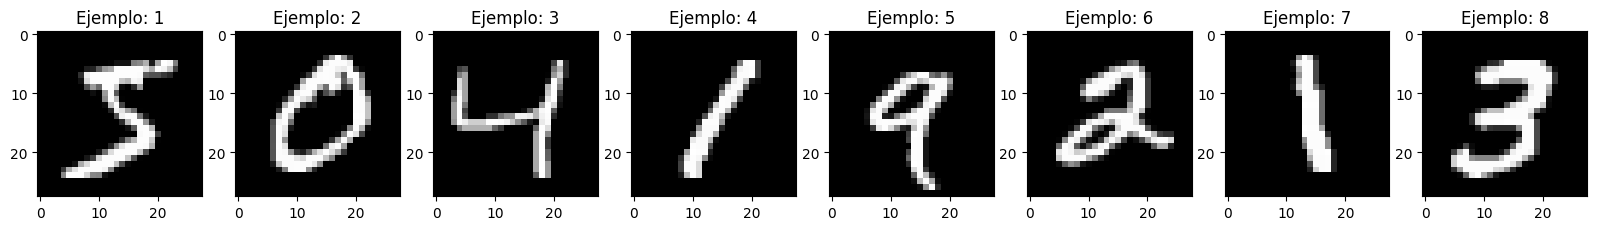

In [16]:
# Visualize the 8 first examples of our train set 
plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

We will divide the test set into two sets, the validation set (X_val) and the test set (X_test).

In [17]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [18]:
X_test.shape

(5000, 28, 28)

In [19]:
X_val.shape

(5000, 28, 28)

### ANN definition and configuration

The Neural network will be made up of different layers that in turn will contain a set of neurons that correspond to the first parameter provided.

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

We define an Artificial Neural Network made up of 3 layers:

- The first layer will be made up of 300 neurons
- The second layer will be made up of 100 neurons
- The last layer will be made up of 10 neurons

In [21]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,))) # 28*28 PIXELS
# the neural netweork should recive a 28*28 vector, we'll need to transfor this afterwards
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax')) # it's a multiclass problem, we have one neuron per class to classify in the output layer

#layers are dense connected (the outputs of the neurons are the inputs of the other neurons)

In [22]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
network.layers # we have 3 layers

In [24]:
hidden1 = network.layers[1]

In [25]:
weights, biases = hidden1.get_weights()

As can be seen in the following cells, Keras automatically initializes the value of the parameters randomly and the bias term with the value 0.

In [26]:
weights

array([[ 0.01054696, -0.07873963, -0.0121947 , ..., -0.11017551,
         0.06973622,  0.03128137],
       [ 0.09280968,  0.02230474,  0.02128572, ..., -0.08978501,
        -0.01613156,  0.11592508],
       [ 0.02015131, -0.09393828,  0.02301892, ..., -0.09904644,
        -0.0521961 ,  0.01516121],
       ...,
       [-0.05324938,  0.09082448,  0.00734048, ..., -0.05150053,
         0.05768723, -0.06347369],
       [-0.01986881,  0.06552958,  0.01314511, ..., -0.03304817,
        -0.03525176,  0.12003592],
       [-0.0468336 ,  0.08963338, -0.05456923, ...,  0.0222288 ,
        -0.06595483, -0.07686218]], dtype=float32)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

For the Artificial Neural Network to work properly it will require three additional components that are selected during the compilation process:

- 1. **The loss function**: It is used in the model parameter optimization process to measure the error produced by modifying the value of the model parameters in a certain direction.
- 2. **The optimization function**: It corresponds to the function responsible for updating the value of the model parameters in a certain direction based on the result of the error function.
- 3. **Metrics to monitor the training process:** It is interesting to use a set of metrics during the training process of the Artificial Neural Network so that we can know in each iteration if the value of the model parameters is adequate or problems such as overfitting are occurring.



In [28]:
network.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy', 'Precision'])

### Data preparation 

We have a matrix and we have to transform it into a vector

In [29]:
X_train_prep = X_train.reshape((60000, 28*28))
X_train_prep = X_train_prep.astype('float32') / 255  # normalization 

X_test_prep = X_test.reshape((5000, 28*28))
X_test_prep = X_test_prep.astype('float32') / 255

X_val_prep = X_val.reshape((5000, 28*28))
X_val_prep = X_val_prep.astype('float32') / 255

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
X_train_prep.shape

(60000, 784)

In [32]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)
y_val_prep = to_categorical(y_val)

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [35]:
y_train_prep # now it's been categorized

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## ANN training

In [36]:
history = network.fit(X_train_prep, 
                      y_train_prep, 
                      epochs=10, 
                      validation_data=(X_val_prep, y_val_prep))



Epoch 1/10


1875/1875 [==============================] - 7s 3ms/step - loss: 0.5749 - accuracy: 0.8485 - precision: 0.9427 - val_loss: 0.2933 - val_accuracy: 0.9176 - val_precision: 0.9463
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2728 - accuracy: 0.9218 - precision: 0.9448 - val_loss: 0.2377 - val_accuracy: 0.9338 - val_precision: 0.9513
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2226 - accuracy: 0.9363 - precision: 0.9538 - val_loss: 0.2036 - val_accuracy: 0.9418 - val_precision: 0.9574
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1896 - accuracy: 0.9457 - precision: 0.9598 - val_loss: 0.1709 - val_accuracy: 0.9498 - val_precision: 0.9651
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1651 - accuracy: 0.9529 - precision: 0.9645 - val_loss: 0.1578 - val_accuracy: 0.9548 - val_precision: 0.9659
Epoch 6/10
1875/1875 [==============================] - 10


Several important values are stored in the history variable:

- The value of model parameters after training
- The list of epochs carried out
- A dictionary with the error produced in each epoch in the training and validation data set

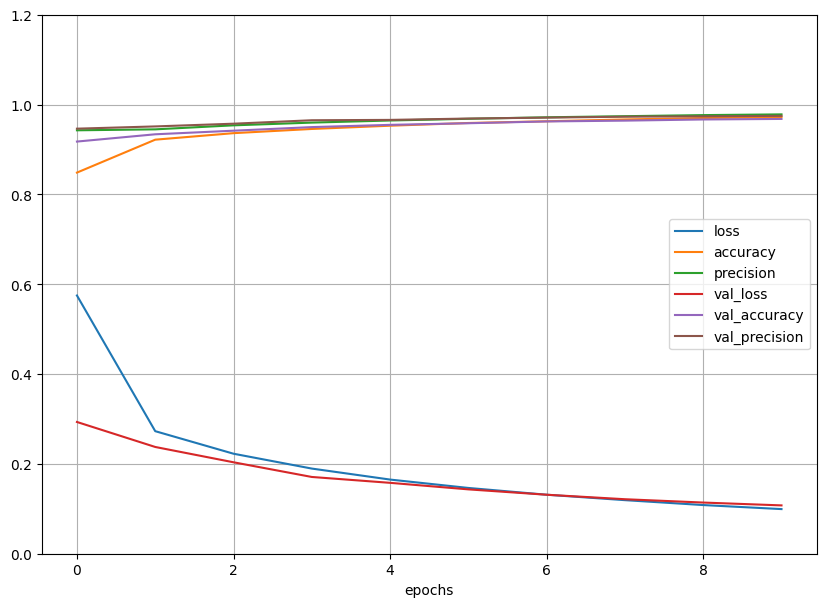

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

# accuracy and precision is calculated from the train set

The graph below helps to identify overfitting. If we see a point where the accuracy and precision of the test set raises but decreases for the validation set, overfitting is likely to be happening and we'll have to reduce the epochs. 

Because the previous graph shows that the error in the data set and validation continues to decrease, we can continue training the algorithm by invoking the fit() method again. Keras will continue training at the point where it left off!!!! We can train it again for 20 epochs more and it will start with the 10 epoch because it saves the results and the parameters values from before.

### Validation with the test set 

Does it generalize well?

In [38]:
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)

157/157 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9686 - precision: 0.9730


In [39]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.9685999751091003
test_prec: 0.9729511737823486


### Predict new examples 

In [50]:
# Let's suppose X_new is a new example that the algorithm has never seen before.
X_new = X_test[37]

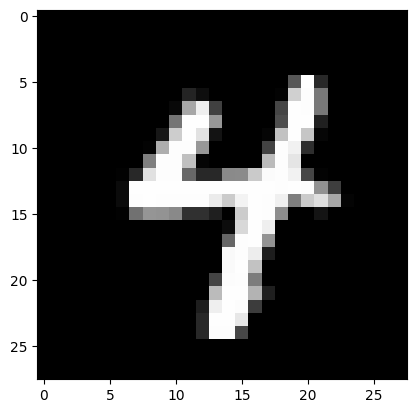

In [51]:
plt.imshow(np.reshape(X_new, (28,28)), cmap=plt.cm.gray)
plt.show()

In [52]:
# Preprocess the new image we want to predict 
X_new_prep = X_new.reshape((1, 28*28))
X_new_prep = X_new_prep.astype('float32') / 255

In [53]:
y_proba = network.predict(X_new_prep)

1/1 [==============================] - 0s 22ms/step


In [54]:
y_proba # we get probabilities as output due to the softmax activation function

array([[1.5167808e-07, 8.4593466e-08, 1.6788832e-07, 1.2457504e-06,
        9.9887639e-01, 3.3339020e-06, 1.9523297e-06, 1.5567351e-04,
        1.4326340e-05, 9.4662572e-04]], dtype=float32)

In [55]:
y_proba.round(2) # we have a 100% probability of that number being a 4 (it goes from 0 to 9)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [56]:
np.argmax(network.predict(X_new_prep), axis=-1) # efectively, it outputs a 4

1/1 [==============================] - 0s 25ms/step


array([4], dtype=int64)

### Save the model

In [57]:
network.save("modelo_mnist.h5") #save it in the disk

C:\Users\Ihona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


It saves also all the parameters, architecture of the network, etc.

In [58]:
from tensorflow.keras.models import load_model
 
mnist_model = load_model("modelo_mnist.h5") # load the model previously saved
 
y_pred = np.argmax(mnist_model.predict(X_new_prep), axis=-1) # do a new prediction

1/1 [==============================] - 0s 63ms/step


In [59]:
y_pred

array([4], dtype=int64)